In [200]:
import aiohttp, http, asyncio, requests, re, time, os, json, pickle
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import steam_tags_f as stf
import functools, random
from dotenv import load_dotenv


In [5]:
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_colwidth', 16)

In [5]:
#%load_ext autoreload
#%autoreload 2 

GETTING THE TAGS AND MULTIPLAYER INFO

In [202]:
url = "http://api.steampowered.com/ISteamApps/GetAppList/v2/"
load_dotenv()
api_key = os.getenv("API_KEY")
params = {"key":api_key}

scode, data = stf.get_url(url, params=params, type = "api")
display(scode)

200

In [ ]:
top1000 = pd.read_csv('TOP 1000 Games cleaned.csv')

In [ ]:
top1000["APP ID"] = 0

In [ ]:
#top1000_2 = stf.add_appid(top1000,app_dict)

In [ ]:
#top1000.to_csv('TOP 1000 Games cleaned AppId.csv', index=False)

In [ ]:
#manually entered some app-ids that were not fetched
appid_fix = pd.read_csv('top_1000_games_cleaned_appid_fix.csv')

In [ ]:
appid_fix

In [ ]:
txt = pd.read_csv(r"top_1000_games_cleaned_appid_fix.csv")
txt = txt.rename({"Game Title":"title", "Steam App ID":"id"}, axis=1)
appid_list = list(txt["id"])

In [ ]:
# Example
appid = 226320

# Step 1: Make a request to the Steam API
response = requests.get(f"http://store.steampowered.com/api/appdetails?appids={appid}")

# Step 2: Parse the response
game = response.json()

#Step 3: Pretty-print the JSON response for better readability
print(json.dumps(game, indent=4))  # Format with indentation of 4 spaces


In [ ]:
genres = game["226320"]["data"]["genres"]
descriptions = [genre["description"] for genre in genres]
print (descriptions)

In [ ]:
result = stf.check_multiplayer_single("1599340")
print(result) 

In [ ]:
#tag_dict = stf.get_tags(appid_list)

In [ ]:
with open ("tag_dict.pkl", "rb") as tag_dict_file:
    tag_dict = pickle.load(tag_dict_file)


In [ ]:
tag_dict

In [ ]:
appid_fix["tags"] = 0

#steam_df_tags = stf.add_tags(appid_fix,tag_dict)

In [ ]:
with open ("steam_df_tags.pkl", "rb") as steam_df_tags_file:
    steam_df_tags = pickle.load(steam_df_tags_file)

#steam_df_tags

In [ ]:
#steam_df_tags.to_csv('steam_appid_tags.csv', index=False)

In [ ]:
#mp_dict = stf.check_multiplayer(appid_list, token, delay=1)

In [ ]:
with open ("steam_df_tags.pkl", "rb") as steam_df_tags_file:
    steam_df_tags = pickle.load(steam_df_tags_file)

with open ("mp_dict.pkl", "rb") as mp_dict_file:
    mp_dict = pickle.load(mp_dict_file)

mp_dict

In [ ]:
with open ("steam_df_tags.pkl", "rb") as steam_df_tags_file:
    steam_df_tags = pickle.load(steam_df_tags_file)

with open ("mp_dict.pkl", "rb") as mp_dict_file:
    mp_dict = pickle.load(mp_dict_file)

steam_df_tags_mp = stf.add_mp(steam_df_tags, mp_dict)

In [ ]:
steam_df_tags_mp.head(20)

In [ ]:
steam_df_tags_mp.to_csv('steam_appid_tags_mp.csv', index=False)

In [ ]:
tags_mp_dict = steam_df_tags_mp.set_index("Steam App ID")["tags"].to_dict()

In [ ]:
tags_mp_dict

In [ ]:
#with open ("tags_mp_dict.pkl", "wb") as tags_mp_dict_file:
    #pickle.dump(tags_mp_dict, tags_mp_dict_file)

In [ ]:
tags_name_dict = steam_df_tags_mp.set_index("Steam App ID")["Game Title"].to_dict()

In [ ]:
tags_name_dict[226320]

In [ ]:
tags_name_dict

In [ ]:
#with open ("tags_name_dict.pkl", "wb") as tags_name_dict_file:
   # pickle.dump(tags_name_dict, tags_name_dict_file)

In [ ]:
out3_extracted.head(10)

In [ ]:
#tags_mp_dict

In [ ]:
#for transposing new_df = out3_extracted.T.copy()

new_df = out3.copy()

In [ ]:
new_df.columns

In [ ]:
new_row = pd.DataFrame(tags_mp_dict, index = [0])

In [ ]:
#add row [0]
#for col in new_df.columns:
#    if col in tags_mp_dict.keys()
#        row [0][column] = tags_mp_dict[key]

In [ ]:
# Define a new row of zeroes with the same number of columns as df
zero_row = pd.DataFrame([[0] * len(new_df.columns)], columns=new_df.columns)

# Concatenate the new zero row at index 0
new_df_0 = pd.concat([zero_row, new_df]).reset_index(drop=True)

In [ ]:
new_df_0

In [ ]:
tags_mp_dict

In [ ]:
tags_mp_dict_str = {str(key):value for key, value in tags_mp_dict.items()}

In [ ]:
tags_mp_dict_str

tags_name_dict = steam_df_tags_mp.set_index("Steam App ID")["Game Title"].to_dict()

In [ ]:
def add_tags_df (df, dict):
    df2 = df.copy()
    for col in df2.columns:
        if col in dict.keys():
            df2.at[0, col] = dict[col]
    return df2
        
        

In [ ]:
with open ("steam_df_tags.pkl", "rb") as steam_df_tags_file:
    steam_df_tags = pickle.load(steam_df_tags_file)

with open ("mp_dict.pkl", "rb") as mp_dict_file:
    mp_dict = pickle.load(mp_dict_file)

steam_df_tags_mp = stf.add_mp(steam_df_tags, mp_dict)

def add_tags_df (df, dict):
    df2 = df.copy()
    for col in df2.columns:
        if col in dict.keys():
            df2.at[0, col] = dict[col]
    return df2

tags_mp_dict_str = {str(key):value for key, value in tags_mp_dict.items()}
df2 = add_tags_df(new_df_0, tags_mp_dict_str)

In [ ]:
df2.head()

In [ ]:
tags_name_dict

In [ ]:
"""
def add_tags_df (df, dict):
    df2 = df.copy()
    for col in df2.columns:
        int_key = int(col)
        if int_key in map (int, dict.keys()):
            df2.at[0, col] = dict[str(col)]
    return df2
"""        
        
    

In [ ]:
"""
for col in df2.columns:
        # Convert the integer key to string for comparison
        str_key = str(col)
        if str_key in map(str, tags_mp_dict.keys()):  # Check if the string version of the key exists in dictionary
            df2.at[0, col] = tags_mp_dict[int(col)]  # Use .at to set value by label

    return df2
"""

In [ ]:
df2

FUNCTIONS

In [192]:
# Graphic Display

def t_plot(db, lines,llegend,yx):
    # Set theme and palette
    sns.set_theme(style="darkgrid")
    sns.set_palette("viridis")

    # plots lines
    plt.figure(figsize=(12, 6))  # Adjust figure size

    for l in lines:
        colors = sns.color_palette("colorblind", 10)
        coloration = random.randint(0,9)
        sns.lineplot(data=db[1:], x=db.index[1:], y=l, marker='o', linestyle='--', linewidth=2, label=l, color=colors[coloration])

    legend = plt.legend(title=llegend, loc='upper left', bbox_to_anchor=(1, 1))
    plt.xlabel('Index')
    plt.ylabel('Values')
    
    # Covid related lines
    plt.axvline(x="November 2019", color='orange', linestyle='--', linewidth=1)
    plt.axvline(x="January 2020", color='red', linestyle='--', linewidth=1)
    plt.axvline(x="June 2020", color='green', linestyle='--', linewidth=1)
    plt.axvline(x="November 2020", color='orange', linestyle='--', linewidth=1)
    plt.axvline(x="November 2021", color='green', linestyle='--', linewidth=1)
    if yx == "y":
        coord = 500000
        plt.text(x="November 2019", y = coord, s='Nov19: China warns about Covid', color='orange', fontsize=10, ha='right', rotation=90)
        plt.text(x="January 2020",  y = coord, s='Jan20: WHO acknoledges Covid', color='red', fontsize=10, ha='right', rotation=90)
        plt.text(x="June 2020",  y = coord, s='Jun20: End of first big lockdown period', color='green', fontsize=10, ha='right', rotation=90)
        plt.text(x="November 2020",  y = coord, s='Nov20: Second Wave', color='orange', fontsize=10, ha='right', rotation=90)
        plt.text(x="November 2021",  y = coord, s='Nov21: Fourth Wave', color='green', fontsize=10, ha='right', rotation=90)
        
    # Game related lines
    #plt.axvline(x="December 2017", color='cyan', linestyle='--', linewidth=1)
    #plt.axvline(x="December 2020", color='cyan', linestyle='--', linewidth=1)
    #plt.axvline(x="September 2021", color='cyan', linestyle='--', linewidth=1)
    #plt.axvline(x="February 2021", color='cyan', linestyle='--', linewidth=1)
    #plt.axvline(x="March 2019", color='cyan', linestyle='--', linewidth=1)


    #plt.text(x="December 2017", y=coord, s="PUBG goes live", color='cyan', fontsize=10, ha='right', rotation=90)
    #plt.text(x="December 2020", y=coord, s="Cyberpunk goes live", color='cyan', fontsize=10, ha='right', rotation=90)
    #plt.text(x="September 2021", y=coord, s="New World goes live", color='cyan', fontsize=10, ha='right', rotation=90)
    #plt.text(x="February 2021", y=coord, s="Valheim goes live", color='cyan', fontsize=10, ha='right', rotation=90)
    #plt.text(x="March 2019", y=coord, s="Sekiro goes live", color='cyan', fontsize=10, ha='right', rotation=90)


    ### Graphic formatting
    dates = df[1:].index
    tick_interval = 3
    tick_indices = range(0, len(dates), tick_interval)

    # Format the date on the x-axis
    plt.xticks(tick_indices, dates[tick_indices], rotation=45, ha="right")

    #Limit x-axis onto a specific interval 
    plt.xlim('August 2022', 'August 2018')  # Specify the limits as strings
    plt.gca().invert_xaxis() # inverts the x-axis (more suited for dates as it grows from left to right)

    # Set titles and labels
    plt.title(llegend)
    plt.xlabel('Date')
    plt.ylabel('Average players per type')

# Z Normalization definition

def z_norm(column):
    mean = column.mean()
    std_dev = column.std()
    return (column - mean) / std_dev

# Creates the tag row

def add_tags_df (df, dict):
    df2 = df.copy()
    for col in df2.columns:
        if col in dict.keys():
            df2.at[0, col] = dict[col]
    return df2


MAIN CODES

In [198]:
# creates the games id list
txt = pd.read_csv(r"C:\\Users\\Utilizador\\Desktop\\IRONHACK\\Project 3\\Project-3\\top1k.csv")
txt = txt.rename({"Game Title":"title", "Steam App ID":"id"}, axis=1)
list_id = list(txt["id"])

In [ ]:
## main program, output

game_id_dict, error_list = stf.overall_fetch(list_id)

In [ ]:
# Saves our main source of information into a feather
output = pd.DataFrame.from_dict(game_id_dict)
output.to_feather("output.feather")

In [ ]:
# Saves our error results into an error csv
err_table = pd.DataFrame(error_list)
err_table.to_csv("error.csv")

In [197]:
### Bridges the webscrapping/API part with the cleaning and processing parts

# imports our feather database & gives us an idea of the shape/NaN's present
output = pd.read_feather("output.feather")
#display(output.isna().sum())
#display(output.shape)

In [8]:
# Cleans database of most recent games (so from Aug 2019 -> Present)
out2 = output.copy() 
filtered = out2.isna().sum(axis=0) > 85 ## 85 = Aug 2019
filter = filtered[filtered]

mask = list(filter.index)
for code in mask:
    out2.drop(code, axis = 1, inplace=True)

In [193]:
### New row 0 
out3 = out2.copy()

# Define a new row of zeroes with the same number of columns as df
zero_row = pd.DataFrame([[0] * len(out3.columns)], columns=out3.columns)

# Concatenate the new zero row at index 0
out4 = pd.concat([zero_row, out3]).reset_index(drop=True)

# imports the tags and the multiplayer tags dictionaries
with open ("steam_df_tags.pkl", "rb") as steam_df_tags_file:
    steam_df_tags = pickle.load(steam_df_tags_file)

with open ("mp_dict.pkl", "rb") as mp_dict_file:
    mp_dict = pickle.load(mp_dict_file)

# joins dictionaries
steam_df_tags_mp = stf.add_mp(steam_df_tags, mp_dict)

# creates the tags row and appends to out4
tags_mp_dict = steam_df_tags_mp.set_index("Steam App ID")["tags"].to_dict()
tags_mp_dict_str = {str(key):value for key, value in tags_mp_dict.items()}
out4_2 = add_tags_df(out4, tags_mp_dict_str)

#display(out4_2)

In [180]:
# Converts "Date" into DataFrame index
out5=out4_2.copy()

# creates a "Date" column
out5_extracted = out5["730"][1:].map(lambda x: x["Date"] if isinstance(x, dict) else x)

# takes appid "730" (which is one of the completed ones and uses it to define "Data" column)
out5["Date"] = out5_extracted # Adds the dates into column "Date"
out5["Date"][0] = "Tags" # Adds the Tags into row 0
out5.set_index("Date", inplace=True) # Sets column "Date" to be the index

#display(out5)

In [181]:
##### Converts columns into game's name
out6 = out5.copy()

# creates the id list
txt2 = txt.rename({"Game Title":"title", "Steam App ID":"id"}, axis=1)
txt2 = txt2[["id","title"]]
txt2.set_index("id", inplace=True)

# Create a mapping from ids to titles
title_mapping = {str(k): v for k, v in txt2["title"].to_dict().items()}

# Rename the columns in out4 using the mapping
out6.columns = [title_mapping.get(str(col), col) for col in out4.columns]

# Creates our main dataframe visualization 
visual = "Peak Players" # DB issue, needs fixing
out6 = out6.apply(lambda x: x.apply(lambda y: y.get(visual) if isinstance(y, dict) and visual in y else y), axis=0)
out6[1:] = round(out6[1:].fillna(0).astype(float),0).astype(int)

#display(out6)

In [182]:
# More cleaning while looking at data. Disregarding outliers etc..
out7 = out6.copy()

## Drops bot-afflicted games that warped data == Outlier
out7.drop("POSTAL", axis=1, inplace=True)

# Creates a new column (Total) and concats into the existing dataframe
out7["Total"]=0
out7.loc[out7.index[1:], 'Total'] = out7.iloc[1:, :].sum(axis=1)

#display(out7)

In [183]:
# Adds Z-Column
out8 = out7.copy()

out8['Z'] = 0 # creates an empty column named "Z"
out8['Z'][1:] = z_norm(out8['Total'][1:]) # adds Z-normalized values into Z column

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_8948\1060460768.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out8['Z'][1:] = z_norm(out8['Total'][1:]) # adds Z-normalized values into Z column


## DATA VISUALIZATION ##

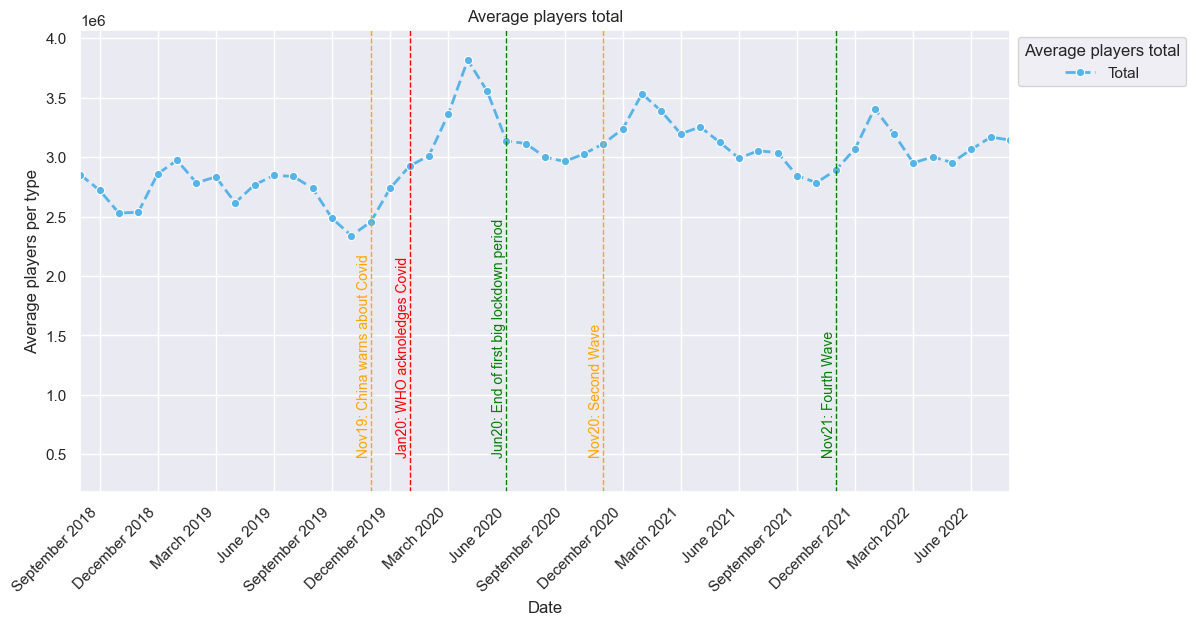

In [184]:
t_plot(out8,["Total"],"Average players total","y")

In [185]:
list_tags =[value.split(",") for value in tags_mp_dict.values()]
list_tags
set_tags = {item.strip() for sublist in list_tags for item in sublist}

#list(set_tags)

In [186]:
# creates a dataframe of a specific genre with a single column that contains the specified value 
def make_type(df, substring):
    df2 = df.copy()
    columns_to_keep = df2.columns[df2.iloc[0].astype(str).str.strip().str.contains(substring)]
    output = df2[columns_to_keep]
    output[substring]=0
    output.loc[output.index[1:], substring] = output.iloc[1:, :].sum(axis=1)
    output = output.filter(like=substring, axis=1)
       
    return output 

# creates the dataframes for all the game_types defined
game_types = ['Racing', 'Sports', 'RPG', 'Action', 'Casual', 'Adventure', 'Indie', 'Simulation', 'Strategy', 'Multi-player', 'Co-op']

# creates a dictionary with all the dataframes created
lgames = {}

for game in game_types:
    globals()[f"{game}_df"] = make_type(out9, game)
    lgames[f"{game}_df"] = globals()[f"{game}_df"]
    

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_8948\2660581146.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output[substring]=0
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_8948\2660581146.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output[substring]=0
C:\Users\Utilizador\AppData\Local\Temp\ipykernel_8948\2660581146.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [187]:
# compresses all the common types: ['Racing', 'Sports']
sports_df = pd.concat([Racing_df, Sports_df], axis=1)
sports_df["sports"]=sports_df.sum(axis=1)
sports_df.drop(['Sports','Racing'], axis=1, inplace = True)
sports_df.rename(columns={"sports": "Sports"}, inplace=True)

lgames["sports_df"]=sports_df

In [188]:
# creates a dataframe of a specific genre with a single column that contains the specified value 
df2 = out8.copy()

columns_to_keep = df2.columns[~df2.iloc[0].astype(str).str.strip().str.contains("Multi-player")]
output = out9[columns_to_keep].copy()

# Step 2: Ensure all relevant columns are numeric
for col in output.columns:
    output[col] = pd.to_numeric(output[col], errors='coerce')

# Step 3: Add "not multi-player" column by summing numeric values, ignoring the first row
output["not Multi-player"] = output.iloc[1:, :].sum(axis=1)  # Sum from the second row onward

# Step 4: Subtract the "Total" for each relevant row
output["not Multi-player"] = output["not Multi-player"] - pd.to_numeric(out9.iloc[1:, out9.columns.get_loc("Total")], errors='coerce')

# Step 5: Ensure values do not exceed the total (if needed)
output["not Multi-player"] = output["not Multi-player"].clip(lower=0)  # Avoid negative values

# Step 6: Filter the resulting DataFrame for "not multi-player"
not_mp_df = output.filter(like="not Multi-player", axis=1)

#not_mp_df

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_8948\1516152021.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  output["not Multi-player"] = output.iloc[1:, :].sum(axis=1)  # Sum from the second row onward


In [189]:
# removes old dataframes from the list 

pop_keys = ['Racing_df', 'Sports_df']

for key in pop_keys:
    lgames.pop(key, None)

# makes a single dataframe with the total average per gametype
lgames_upd=None

for df in lgames.values():
    if lgames_upd is None:
        lgames_upd = df
    else:
        lgames_upd = pd.merge(lgames_upd, df, left_index=True, right_index=True)

lgames_upd["not Multi-player"] = not_mp_df
lgames_upd["Total"] = out7["Total"]
#display(lgames_upd)

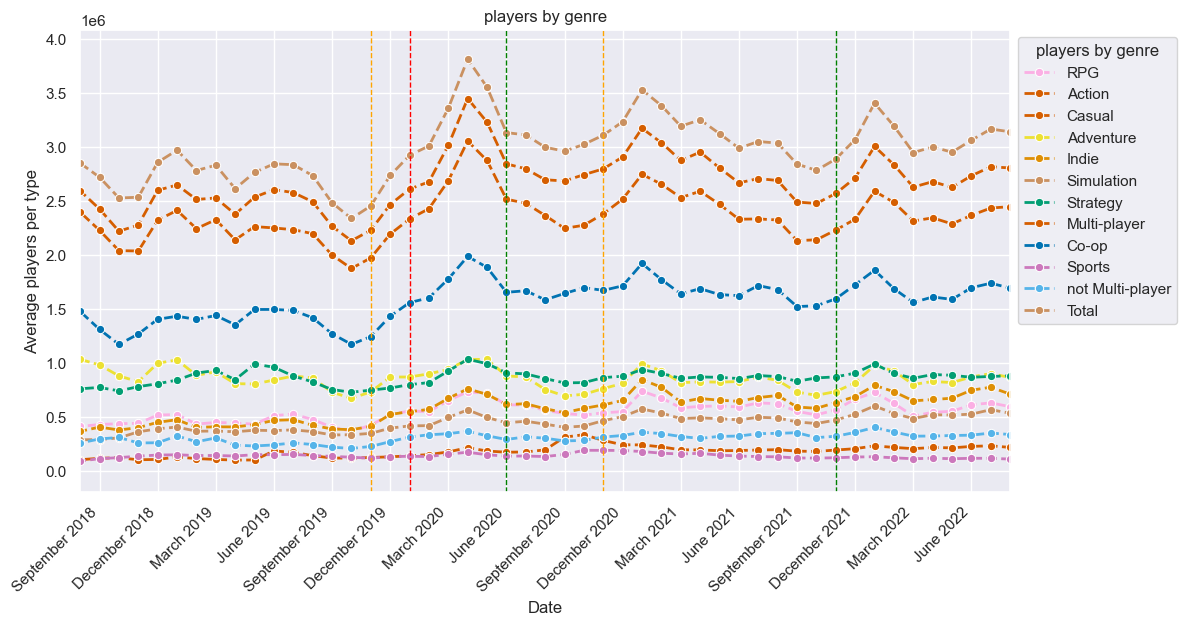

In [190]:
t_plot(lgames_upd,list(lgames_upd.columns),"players by genre","n")

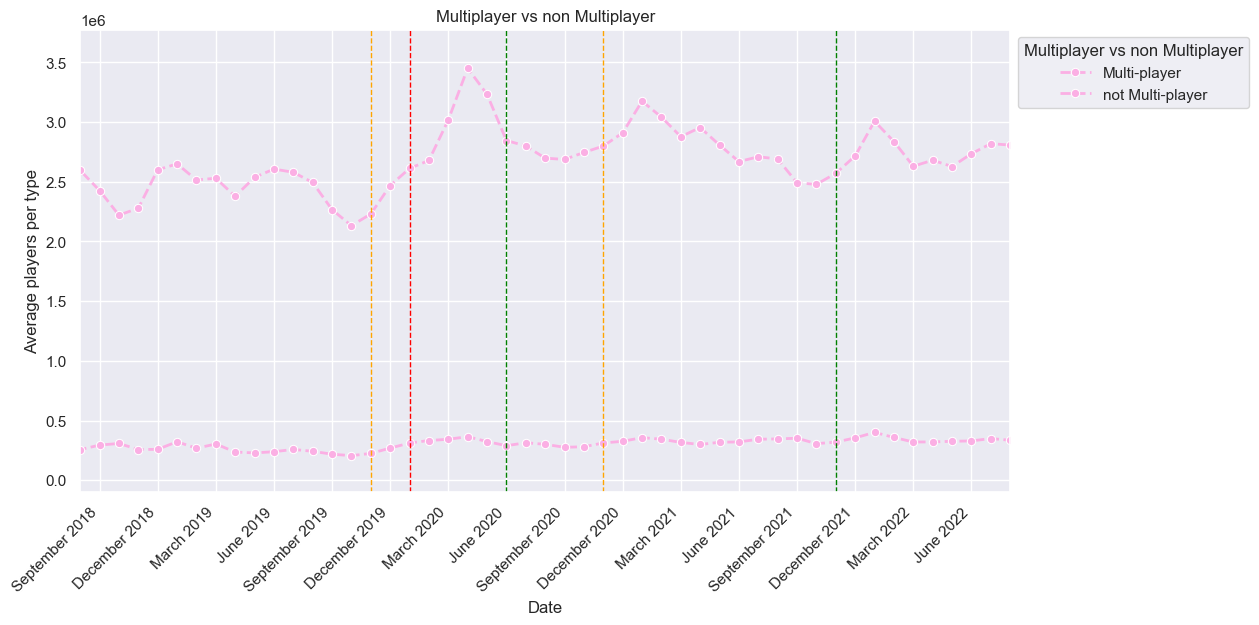

In [191]:
t_plot(lgames_upd,["Multi-player", "not Multi-player"],"Multiplayer vs non Multiplayer","n")